In [1]:
import adpipy

In [3]:
help(adpipy)

Help on package adpipy:

NAME
    adpipy

PACKAGE CONTENTS
    AlmaMap
    ExtractNSigmaRegions
    NoiseCal

FILE
    /Users/menorahlam/myvenv/lib/python3.8/site-packages/adpipy/__init__.py




## Create the 2D-image FITS file from the original FITS using adpipy.AlmaMap

In [20]:
am = adpipy.AlmaMap(imagename='UV-171060.4spw.cont.image.fits')

UV-171060.4spw.cont.image.fits is a ALMA Continuum Map


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [23]:
am.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 149.7895  2.34132778  253383721004.1  1.0  
CRPIX : 91.0  91.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -5.555555555556e-05  5.555555555556e-05  18738760669.19  1.0  
NAXIS : 180  180  1  1

In [24]:
am.write_img2fits()

In [2]:
am2d = adpipy.AlmaMap(imagename='UV-171060.2d.image.fits')

UV-171060.2d.image.fits is a 2D ALMA Continuum Map. It doesn't have frequency channels - NAXIS3


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [3]:
am2d.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 149.7895  2.34132778  
CRPIX : 91.0  91.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.555555555556e-05  5.555555555556e-05  
NAXIS : 180  180

In [5]:
help(adpipy.ExtractNSigmaRegions)

Help on module adpipy.ExtractNSigmaRegions in adpipy:

NAME
    adpipy.ExtractNSigmaRegions

DESCRIPTION
    Lead Developer: Timothy Yu
    Email: tinyau.yu@outlook.com
    Date: 2022.06.26

CLASSES
    adpipy.NoiseCal.AlmaMap_NoiseCal(adpipy.AlmaMap.AlmaMap)
        AlmaMap_ExtractNSigmaRegions
    
    class AlmaMap_ExtractNSigmaRegions(adpipy.NoiseCal.AlmaMap_NoiseCal)
     |  AlmaMap_ExtractNSigmaRegions(imagename='', region='', subregion='', nsigma_lvls=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), **kwargs)
     |  
     |  A child class of AlmaMap class which computes the RMS noise of a non-primary beam corrected map or a region of the map
     |  
     |  Parameters
     |  ----------
     |  imagename: str
     |      The path to the FITS file
     |  
     |  region: str
     |      The path to the CASA region file with an extension of .crtf
     |      Without region file, the default region is the whole map
     |  
     |  kwargs: 
     |      The key arguments for

In [2]:
adpipy.ExtractNSigmaRegions.AlmaMap_ExtractNSigmaRegions(imagename='UV-171060.2d.image.fits', subregion='UV-171060_peri.crtf')

UV-171060.2d.image.fits is a 2D ALMA Continuum Map. It doesn't have frequency channels - NAXIS3
CASA Region File is NOT provided... 
Extract RMS noise using the whole map...
RMS Calculation Results: 
------------------------------- 
RMS Noise Estimation using Least Square Curve Fitting 
RMS Noise = 1.91e-05 +/- 1.22e-07 [Jy/beam] 
------------------------------- 
Goodness of fit statistics 
R2 = 9.96e-01
CASA Region File is detected... 
Extract N-sigma regions from the subregion...


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/menorahlam/myvenv/lib/python3.8/site-packages/adpipy/ExtractNSigmaRegions.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  poly = np.array(conts.allsegs)[0]  # polygonal pixel coordinates of the contours
/Users/menorahlam/myvenv/lib/python3.8/site-packages/adpipy/ExtractNSigmaRegions.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  poly = np.array(conts.allsegs)[0]  # polygonal pixel coordinates of the contours
/Users/me

In [3]:
from casatasks import imval
import numpy as np
import matplotlib.pylab as plt
import os, sys
import json
# normalization
from astropy.visualization import SqrtStretch
from astropy.visualization.stretch import AsinhStretch
from astropy.visualization.stretch import LinearStretch
from astropy.visualization import ImageNormalize
from astropy.visualization import simple_norm
from astropy.visualization import PercentileInterval
from astropy.visualization import AsymmetricPercentileInterval

In [3]:
results = imval('UV-171060.2d.image.fits', region='UV-171060_peri.crtf')

NameError: name 'imval' is not defined

In [5]:
results['data'].shape

(20, 18)

In [6]:
results['mask'].shape

(20, 18)

In [7]:
results['data'][results['mask']].shape

(277,)

In [8]:
imgdata = results['data']*results['mask']

In [9]:
pmin, pmax = 0.25, 99.75
interval = AsymmetricPercentileInterval(pmin, pmax)
vmin, vmax = interval.get_limits(imgdata)
stretch = LinearStretch()
norm = ImageNormalize(stretch=stretch, vmin=vmin, vmax=vmax)

In [10]:
wcs = adpipy.AlmaMap(imagename='UV-171060.2d.image.fits').wcs
rms = adpipy.AlmaMap_NoiseCal(imagename='UV-171060.2d.image.fits').rms['rms_noise']

UV-171060.2d.image.fits is a 2D ALMA Continuum Map. It doesn't have frequency channels - NAXIS3
UV-171060.2d.image.fits is a 2D ALMA Continuum Map. It doesn't have frequency channels - NAXIS3
CASA Region File is NOT provided... 
Extract RMS noise using the whole map...
RMS Calculation Results: 
------------------------------- 
RMS Noise Estimation using Least Square Curve Fitting 
RMS Noise = 1.91e-05 +/- 1.22e-07 [Jy/beam] 
------------------------------- 
Goodness of fit statistics 
R2 = 9.96e-01


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


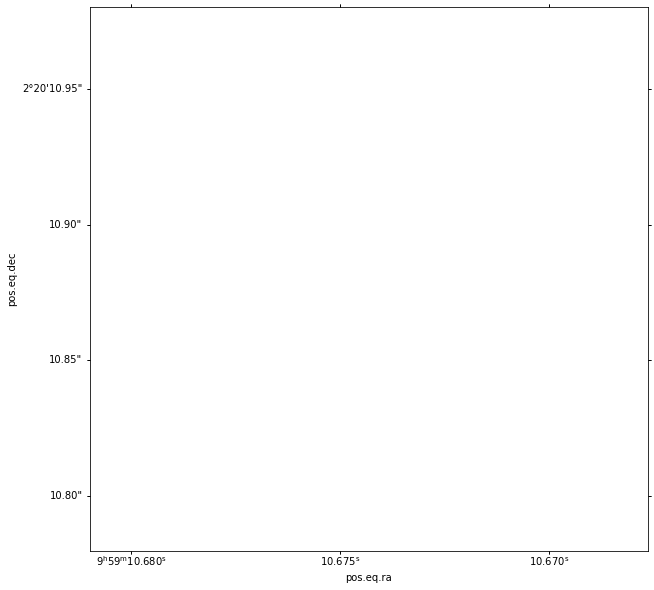

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection=wcs)

In [12]:
conts = ax.contour(imgdata, 
                    levels=tuple(np.array([2])*rms), 
                    colors='white',
                    transform=ax.get_transform(wcs),
                    linewidths=2,
                    alpha=0.8)

In [13]:
im = ax.imshow(adpipy.AlmaMap(imagename='UV-171060.2d.image.fits').imgdata, cmap='Greys', norm=norm)  # plot the whole map from the FITS file

UV-171060.2d.image.fits is a 2D ALMA Continuum Map. It doesn't have frequency channels - NAXIS3


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [15]:
# get contour coordinates
poly = np.array(conts.allsegs)[0]  # polygonal pixel coordinates of the contours
pix = np.array(['pix'])
prefix = np.array(['poly '])
num_cont = 1
file_title = 'testing.sigma.'

In [16]:
x = poly[0][:,0]  # x-coordinates of the contours
y = poly[0][:,1]  # y-coordinates of the contours